In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df.isnull().sum()


age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

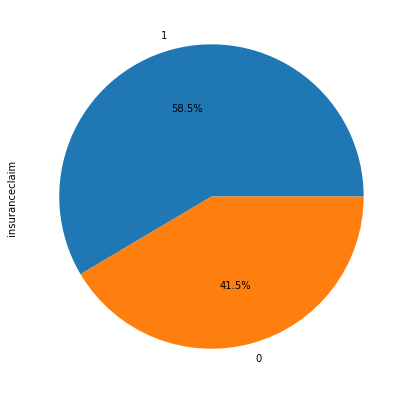

In [5]:
plt.figure(figsize=(7,7))
df["insuranceclaim"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

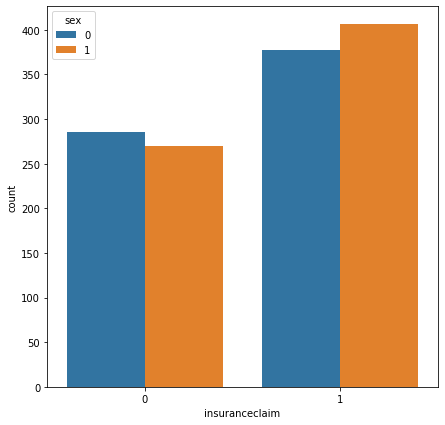

In [6]:

plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue='sex')
plt.show()

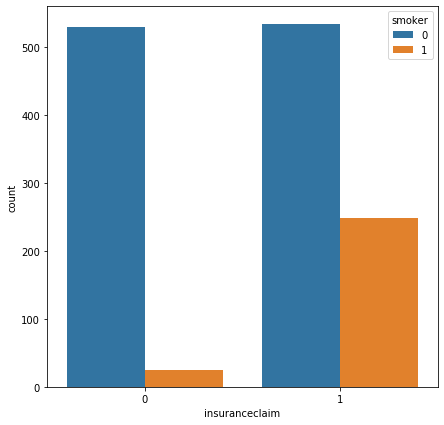

In [7]:

plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="smoker")
plt.show()

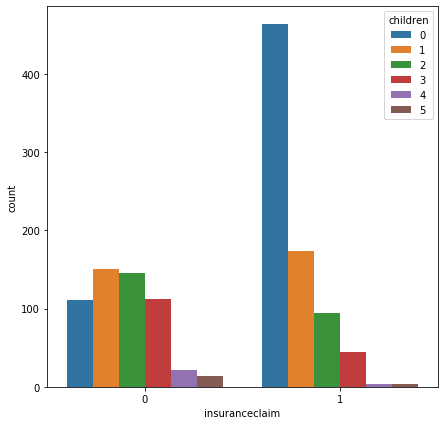

In [8]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="children")
plt.show()

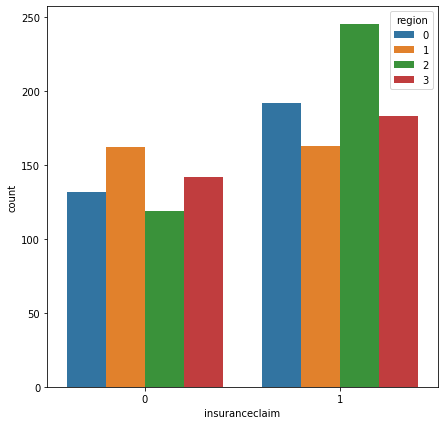

In [9]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="region")
plt.show()

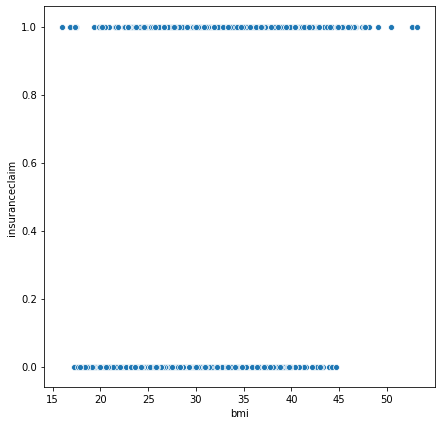

In [10]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="bmi",y="insuranceclaim")
plt.show()

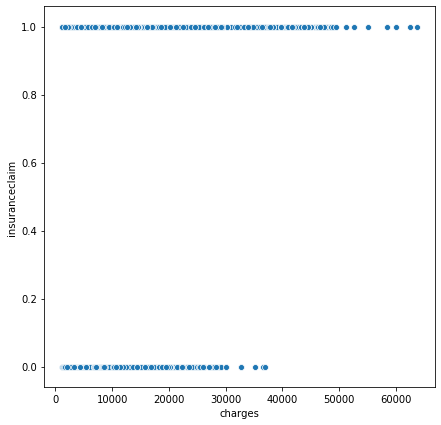

In [11]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="charges",y="insuranceclaim")
plt.show()

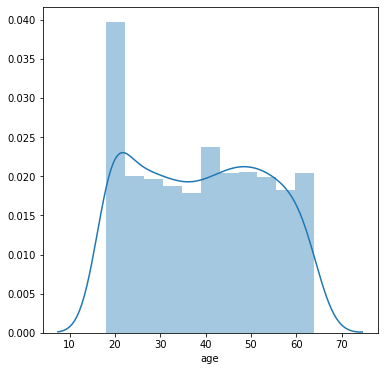

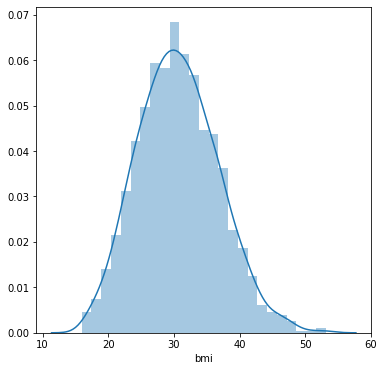

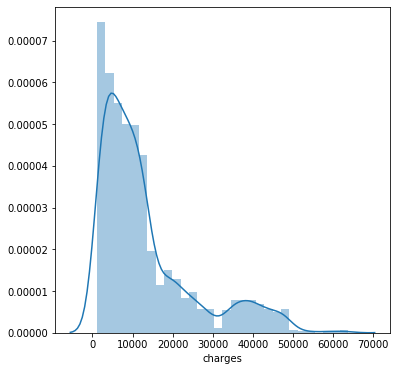

In [12]:
cols = ["age","bmi","charges"]

for col in cols:
    plt.figure(figsize=(6,6))
    sns.distplot(df[col])
    plt.show()

In [13]:
def create_model(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
lr = LogisticRegression()

In [16]:
lr = create_model(lr,X,y)


              precision    recall  f1-score   support

           0       0.77      0.70      0.74       157
           1       0.82      0.87      0.84       245

    accuracy                           0.80       402
   macro avg       0.80      0.79      0.79       402
weighted avg       0.80      0.80      0.80       402



In [17]:
dt = DecisionTreeClassifier()


In [18]:
dt = create_model(dt,X,y)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       157
           1       0.99      0.99      0.99       245

    accuracy                           0.99       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.99      0.99      0.99       402



In [19]:
dt.feature_importances_


array([0.0701922 , 0.        , 0.42187374, 0.3335719 , 0.16581384,
       0.        , 0.00854832])

# Decision Tree with Max depth

In [20]:
dt2 = DecisionTreeClassifier(max_depth=5)

In [21]:
dt2 = create_model(dt2,X,y)


              precision    recall  f1-score   support

           0       0.85      0.94      0.89       157
           1       0.96      0.89      0.92       245

    accuracy                           0.91       402
   macro avg       0.90      0.92      0.91       402
weighted avg       0.91      0.91      0.91       402



In [22]:
dt2.feature_importances_


array([0.06088956, 0.        , 0.36385072, 0.36645051, 0.19857208,
       0.        , 0.01023713])

# decision Tree with min sample leaf

In [23]:
dt3 = DecisionTreeClassifier(min_samples_leaf=90)


In [24]:
dt3 = create_model(dt3,X,y)


              precision    recall  f1-score   support

           0       0.77      0.75      0.76       157
           1       0.84      0.86      0.85       245

    accuracy                           0.82       402
   macro avg       0.81      0.80      0.81       402
weighted avg       0.81      0.82      0.82       402



In [25]:
dt3.feature_importances_


array([0.        , 0.        , 0.34502725, 0.4225545 , 0.        ,
       0.        , 0.23241826])

In [27]:
df = pd.read_csv('bank.csv')

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [30]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

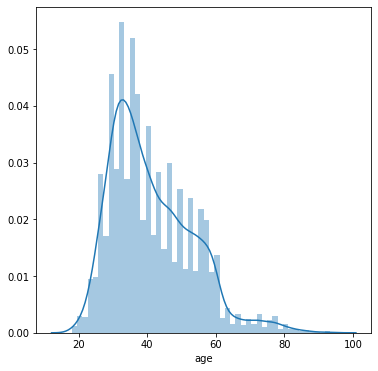

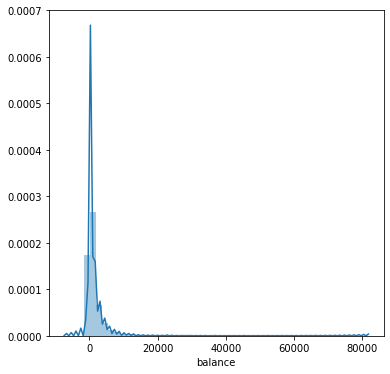

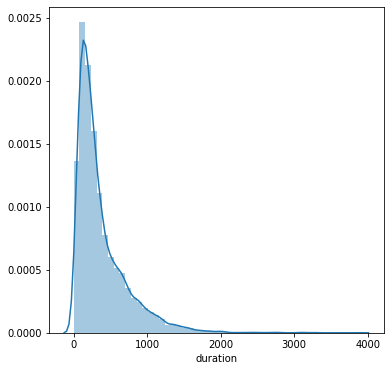

In [34]:
cols = ["age","balance","duration"]

for col in cols:
    plt.figure(figsize=(6,6))
    sns.distplot(df[col])
    plt.show()

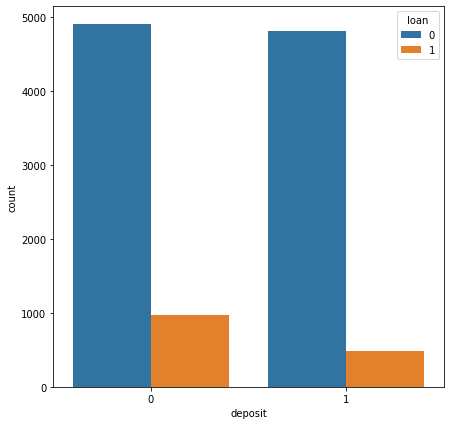

In [35]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="deposit",hue="loan")
plt.show()

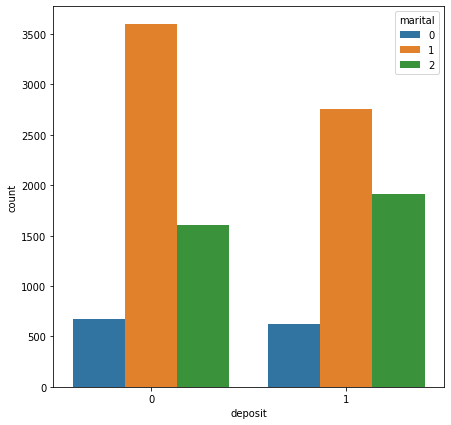

In [36]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="deposit",hue="marital")
plt.show()

In [ ]:
sns.scatterplot(df,y='deposit',x='duration')
plt.show()

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=1)

In [45]:
dt = DecisionTreeClassifier()

In [46]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
dt.score(X_train,Y_train)

1.0

In [50]:
Y_pred = dt.predict(X_test)

In [51]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1760
           1       0.78      0.77      0.78      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



In [53]:
dt.feature_importances_     # most important is duration

array([0.08657469, 0.03853922, 0.01465552, 0.01257902, 0.00045636,
       0.08114434, 0.04264545, 0.00710422, 0.06206638, 0.07711522,
       0.09497363, 0.35295102, 0.02029853, 0.06008285, 0.00625941,
       0.04255414])

In [54]:
# make it in function 

In [65]:
def create_model(model):
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    print(classification_report(Y_test,Y_pred))
    return model

In [66]:
lr = LogisticRegression()
create_model(lr)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.78      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
dt = DecisionTreeClassifier()
create_model(dt)

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1760
           1       0.78      0.77      0.78      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [68]:
# Prunning
dt2 = DecisionTreeClassifier(max_depth=10)
create_model(dt2)

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1760
           1       0.81      0.80      0.80      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.81      0.81      3349
weighted avg       0.82      0.82      0.82      3349



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
dt2 = DecisionTreeClassifier(max_depth=8)
create_model(dt2)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1760
           1       0.81      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [79]:
dt3 = DecisionTreeClassifier(min_samples_leaf=50)
create_model(dt3)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [80]:
# by using measure entropy
dt4 = DecisionTreeClassifier(min_samples_leaf=50,criterion="entropy")
create_model(dt4)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1760
           1       0.81      0.82      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [81]:
from sklearn import tree

[Text(149.22771226415097, 209.07692307692307, 'X[11] <= 206.5\nentropy = 0.998\nsamples = 7813\nvalue = [4113, 3700]'),
 Text(53.40919811320755, 192.35076923076923, 'X[11] <= 88.5\nentropy = 0.731\nsamples = 3136\nvalue = [2495, 641]'),
 Text(19.652830188679246, 175.62461538461537, 'X[11] <= 62.5\nentropy = 0.247\nsamples = 973\nvalue = [933, 40]'),
 Text(11.230188679245284, 158.89846153846153, 'X[12] <= 2.5\nentropy = 0.098\nsamples = 551\nvalue = [544, 7]'),
 Text(8.422641509433962, 142.1723076923077, 'X[11] <= 49.5\nentropy = 0.167\nsamples = 284\nvalue = [277, 7]'),
 Text(5.615094339622642, 125.44615384615385, 'X[10] <= 5.5\nentropy = 0.244\nsamples = 173\nvalue = [166, 7]'),
 Text(2.807547169811321, 108.72, 'entropy = 0.4\nsamples = 63\nvalue = [58, 5]'),
 Text(8.422641509433962, 108.72, 'X[0] <= 36.5\nentropy = 0.131\nsamples = 110\nvalue = [108, 2]'),
 Text(5.615094339622642, 91.99384615384615, 'entropy = 0.242\nsamples = 50\nvalue = [48, 2]'),
 Text(11.230188679245284, 91.99384

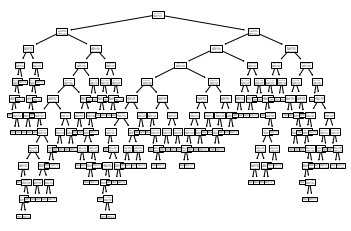

In [82]:
tree.plot_tree(dt2)

# Cross Validation

In [83]:
from sklearn.model_selection import cross_val_score

In [86]:
l1_cross = cross_val_score(dt3,X,Y,cv=4)


In [87]:
l1_cross

array([0.75250716, 0.76523297, 0.80967742, 0.82258065])

In [89]:
l2_cross = cross_val_score(dt4,X,Y,cv=4)    # devide the data in 4 parts


In [90]:
l2_cross

array([0.74355301, 0.76164875, 0.81935484, 0.80967742])

In [91]:
np.mean(l1_cross)     # using gini index measure that model is good than dt4

0.7874995506875764

In [92]:
np.mean(l2_cross)

0.7835585030450545

In [94]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [95]:
lsvc = LinearSVC()
create_model(lsvc)

              precision    recall  f1-score   support

           0       0.66      0.80      0.72      1760
           1       0.71      0.54      0.62      1589

    accuracy                           0.68      3349
   macro avg       0.69      0.67      0.67      3349
weighted avg       0.68      0.68      0.67      3349



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
lsvc2 = LinearSVC(C=0.2)      # add error ie 0
.20
create_model(lsvc2)

In [96]:
rbf = SVC()
create_model(rbf)   # radial bias kernal function

              precision    recall  f1-score   support

           0       0.53      1.00      0.69      1760
           1       0.43      0.00      0.00      1589

    accuracy                           0.53      3349
   macro avg       0.48      0.50      0.35      3349
weighted avg       0.48      0.53      0.36      3349



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
poly = SVC(kernel='poly')
create_model(poly)